In [1]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

C:\Users\JAAME\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
X,y=mnist.data,mnist.target

X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
X.shape

(70000, 784)

In [7]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [8]:
y.shape

(70000,)

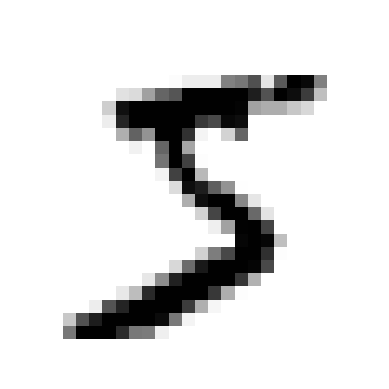

In [9]:
import matplotlib.pyplot as plt
def plot_digit(image_data):
    image =image_data.reshape(28,28)
    plt.imshow(image,cmap='binary')
    plt.axis('off')

some_digit = X[0]
plot_digit(some_digit)

In [10]:
y[0]

'5'

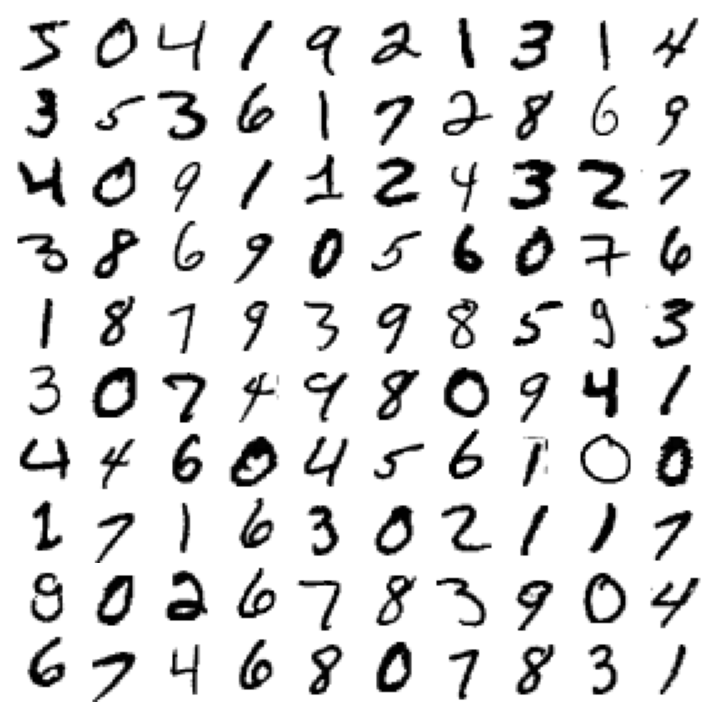

In [11]:
plt.figure(figsize=(9,9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)

plt.subplots_adjust(wspace=0,hspace=0)

In [12]:
X_train, X_test, y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]\



# Training a binary classifier

In [13]:
y_train_5 = (y_train=='5')
y_test_5 = (y_test == '5')

In [14]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=  42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [15]:
sgd_clf.predict([some_digit])

array([ True])

# Performance Measures

## Cross Validation

In [16]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv = 3,scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [17]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train,y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [18]:
cross_val_score(dummy_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.90965, 0.90965, 0.90965])

## Confusion matrix

In [19]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [20]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5,y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [21]:
y_train_perfect_pred = y_train_5
confusion_matrix(y_train_5,y_train_perfect_pred)


array([[54579,     0],
       [    0,  5421]], dtype=int64)

The first row is the negative class

##  Precision and Recall

In [22]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_5,y_train_pred)

0.8370879772350012

In [23]:
recall_score(y_train_5,y_train_pred)

0.6511713705958311

In [24]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7325171197343846

In [25]:
# extra code – this cell also computes the precision: TP / (FP + TP)
cm[1, 1] / (cm[0, 1] + cm[1, 1])

0.8370879772350012

In [26]:
# extra code – this cell also computes the recall: TP / (FN + TP)
cm[1, 1] / (cm[1, 0] + cm[1, 1])

0.6511713705958311

In [27]:
# extra code – this cell also computes the f1 score
cm[1, 1] / (cm[1, 1] + (cm[1, 0] + cm[0, 1]) / 2)

0.7325171197343847

## Precision/Recall Trade-off

In [28]:
y_score = sgd_clf.decision_function([some_digit])
y_score

array([2164.22030239])

In [29]:
threshold = 0
y_score_digit_pred = (y_score>threshold)
y_score_digit_pred

array([ True])

In [30]:
threshold=3000
y_score_digit_pred = (y_score>threshold)
y_score_digit_pred

array([False])

In [31]:
y_score = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method='decision_function')

In [32]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds = precision_recall_curve(y_train_5,y_score)

<function matplotlib.pyplot.show(close=None, block=None)>

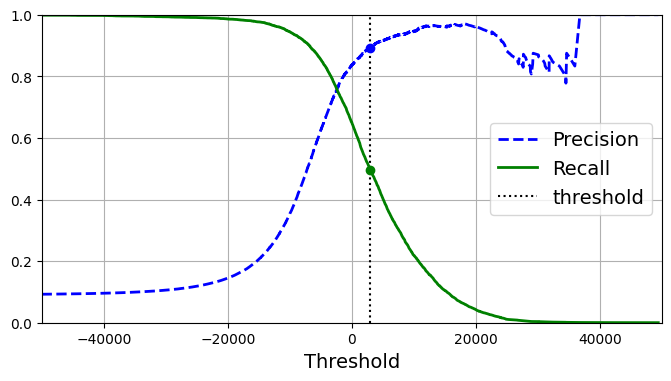

In [33]:
plt.figure(figsize=(8,4))
plt.plot(thresholds,precisions[:-1],'b--',label = 'Precision',lw=2)
plt.plot(thresholds,recalls[:-1],'g-',label = 'Recall',lw=2)
plt.vlines(threshold,0,1.0,'k','dotted',label = 'threshold')
idx = (thresholds>=threshold).argmax()
plt.plot(thresholds[idx],precisions[idx],'bo')
plt.plot(thresholds[idx],recalls[idx],'go')
plt.axis([-50000,50000,0,1])
plt.grid()
plt.xlabel('Threshold')
plt.legend(loc = 'center right')
plt.show

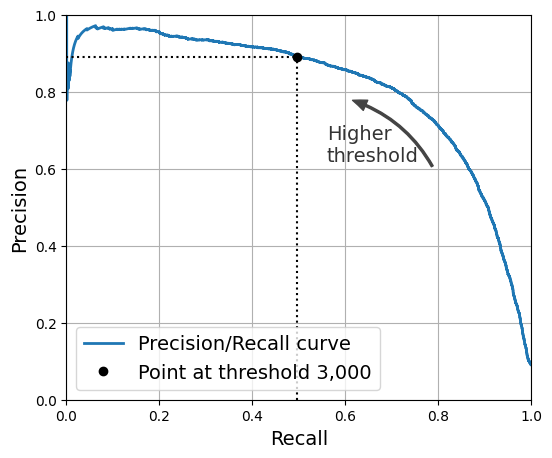

In [34]:
import matplotlib.patches as patches  # extra code – for the curved arrow

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

# extra code – just beautifies and saves Figure 3–6
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 3,000")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")

plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.show()

In [35]:
idx_for_90_precision = (precisions>=0.90).argmax()
threshold_for_90_precision =thresholds[idx_for_90_precision]
threshold_for_90_precision

3370.0194991439557

In [36]:
y_train_pred_90 = (y_score>=threshold_for_90_precision)

In [37]:
precision_score(y_train_5,y_train_pred_90)

0.9000345901072293

In [38]:
recall_at_90_precision = recall_score(y_train_5,y_train_pred_90)
recall_at_90_precision

0.4799852425751706

## The ROC Curve

In [39]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_train_5,y_score)

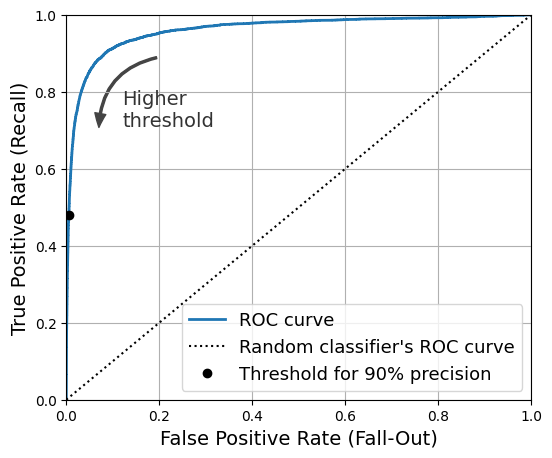

In [40]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

# extra code – just beautifies and saves Figure 3–7
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)
plt.show()

In [41]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_score)

0.9604938554008616

In [42]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

In [43]:
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method='predict_proba')


In [44]:
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

In [45]:
idx_50_to_60 = (y_probas_forest[:, 1] > 0.50) & (y_probas_forest[:, 1] < 0.60)
print(f"{(y_train_5[idx_50_to_60]).sum() / idx_50_to_60.sum():.1%}")

94.0%


In [46]:
y_score_forest = y_probas_forest[:,1]
precisions_forest, recalls_forrest,threshols_forest = precision_recall_curve(y_train_5,y_score_forest)

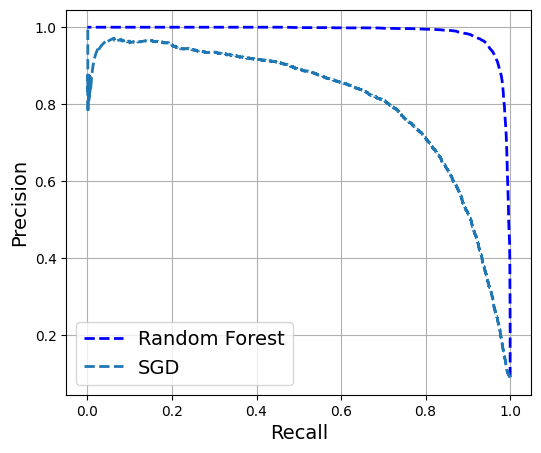

In [47]:
plt.figure(figsize=(6,5))
plt.plot(recalls_forrest,precisions_forest,'b--',lw=2,label='Random Forest')
plt.plot(recalls,precisions,'--',lw=2,label= 'SGD')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.legend(loc='lower left')
plt.show()

In [48]:
y_train_pred_forest = y_probas_forest[:,1]>=0.5
f1_score(y_train_5,y_train_pred_forest)

0.9274509803921569

In [49]:
roc_auc_score(y_train_5,y_score_forest)

0.9983436731328145

In [50]:
precision_score(y_train_5, y_train_pred_forest)

0.9897468089558485

In [51]:
recall_score(y_train_5, y_train_pred_forest)

0.8725327430363402

# Multiclass Classification

In [52]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

In [53]:
svm_clf.predict([some_digit])


array(['5'], dtype=object)

In [54]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [55]:
class_id = some_digit_scores.argmax()
class_id

5

In [56]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [57]:
svm_clf.classes_[class_id]

'5'

how to get all 45 OvO scores if needed

In [58]:
svm_clf.decision_function_shape='ovo'
some_digit_scores_ovo=svm_clf.decision_function([some_digit])
some_digit_scores_ovo.round(2)

array([[ 0.11, -0.21, -0.97,  0.51, -1.01,  0.19,  0.09, -0.31, -0.04,
        -0.45, -1.28,  0.25, -1.01, -0.13, -0.32, -0.9 , -0.36, -0.93,
         0.79, -1.  ,  0.45,  0.24, -0.24,  0.25,  1.54, -0.77,  1.11,
         1.13,  1.04,  1.2 , -1.42, -0.53, -0.45, -0.99, -0.95,  1.21,
         1.  ,  1.  ,  1.08, -0.02, -0.67, -0.14, -0.3 , -0.13,  0.25]])

In [59]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [60]:
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [61]:
len(ovr_clf.estimators_)

10

In [62]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

In [63]:
sgd_clf.decision_function([some_digit]).round()

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

In [64]:
cross_val_score(sgd_clf,X_train,y_train,cv=3
                , scoring='accuracy')


array([0.87365, 0.85835, 0.8689 ])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype('float64'))
cross_val_score(sgd_clf,X_train_scaled,y_train,cv=3,scoring='accuracy')

# Error Analysis

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3)
plt.rc('font',size=9)
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred)
plt.show()

In [ ]:
plt.rc('font',size=10)
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,normalize='true',values_format='.0%')
plt.show()

In [ ]:
sample_weight = (y_train_pred!=y_train)
plt.rc('font',size =10)
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,normalize='true',values_format='.0%')
plt.show()

In [14]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_multilabel = np.c_[y_train_large,y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabel)

KNeighborsClassifier()

In [ ]:
knn_clf.predict([some_digit])

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf,X_train,y_multilabel,cv=3)
f1_score(y_multilabel,y_train_knn_pred,average='macro')

In [ ]:
from  sklearn.multioutput import ClassifierChain

chain_clf = ClassifierChain(SVC(),cv=3,random_state=42)
chain_clf.fit(X_train[:2000],y_multilabel[:2000])

In [ ]:
chain_clf.predict([some_digit])

# Multioutput Classification

In [ ]:
np.random.seed(42)
noise = np.random.randint(0,100,(len(X_train),784))
X_train_mod = X_train+noise
noise = np.random.randint(0,100,(len(X_test),784))
X_test_mod = X_test+noise
y_train_mod = X_train
y_test_mod = X_test

In [ ]:
plt.subplot(121); plot_digit(X_test_mod[0])
plt.subplot(122); plot_digit(y_test_mod[0])
plt.show()

In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digit(clean_digit)
plt.show()

In [28]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
baseline_accuracy = knn_clf.score(X_test,y_test)
baseline_accuracy

0.9688

In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ['uniform','distance'],'n_neighbors':[3,4,5,6]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf,param_grid,cv = 5)
grid_search.fit(X_train[:10_000],y_train[:10_000])

C:\Users\JAAME\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\JAAME\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JAAME\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\JAAME\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5, 6],
                          'weights': ['uniiform', 'distance']}])

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5, 6],
                          'weights': ['uniform', 'distance']}])

In [23]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [24]:
grid_search.best_score_

0.9441999999999998

In [26]:
grid_search.best_estimator_.fit(X_train, y_train)
tuned_accuracy = grid_search.score(X_test, y_test)
tuned_accuracy

0.9714

## Data Augmentation

In [30]:
from scipy.ndimage import shift

def shift_image(image, dx, dy):
    image = image.reshape((28,28))
    shifted_image = shift(image, [dy, dx], cval = 0, mode='constant')
    return shifted_image.reshape([-1])

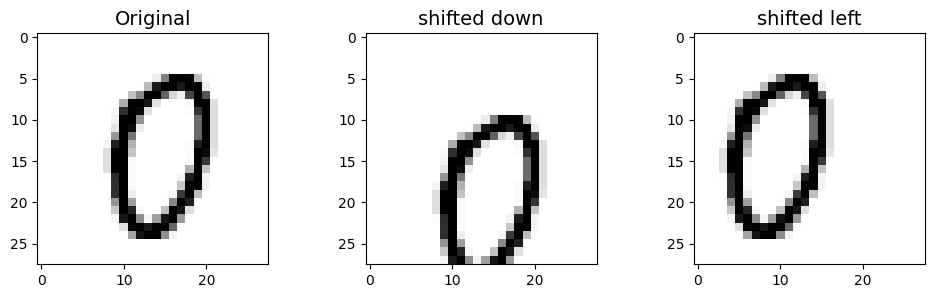

In [33]:
image= X_train[1000]
shifted_image_down = shift_image(image,0,5)
shifted_image_left = shift_image(image,-5,0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title('Original')
plt.imshow(image.reshape(28,28),interpolation='nearest',cmap = 'Greys')
plt.subplot(132)
plt.title('shifted down')
plt.imshow(shifted_image_down.reshape(28,28),interpolation='nearest',cmap='Greys')
plt.subplot(133)
plt.title('shifted left')
plt.imshow(shifted_image_left.reshape(28,28),interpolation='nearest',cmap='Greys')

In [34]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]
for dx, dy in ((-1, 0), (1, 0), (0, 1), (0, -1)):
    for image,label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image,dx,dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [35]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [36]:
knn_clf = KNeighborsClassifier(**grid_search.best_params_)

In [37]:
knn_clf.fit(X_train_augmented,y_train_augmented)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [38]:
augmented_accuracy = knn_clf.score(X_test, y_test)
augmented_accuracy

0.9763

In [39]:
error_rate_change = (1 - augmented_accuracy) / (1 - tuned_accuracy) - 1
print(f'error_rate_change =  {error_rate_change: .0%}')

error_rate_change =  -17%
